# **US vs China: Growth Efficiency and Carbon Intensity (1990–2019)**

This project analyzes the relationship between economic growth and carbon emissions in the United States and China between 1990 and 2019. The dataset combines GDP in constant dollars, total CO₂ emissions, and population data for both countries. The objective is to evaluate growth efficiency, specifically how effectively each country converted carbon emissions into economic output over time.

The analysis focuses on descriptive statistics and visual exploration.

This notebook addresses the following questions:


	1.	How did total GDP evolve in the United States and China from 1990 to 2019?
	2.	How did total CO₂ emissions change over the same period?
	3.	Which country had higher carbon intensity in 1990?
	4.	How did carbon intensity evolve over time in both countries?
	5.	Which country experienced the larger percentage decline in carbon intensity from 1990 to 2019?
	6.	Did either country experience periods of absolute decoupling where GDP increased while CO₂ emissions declined?
	7.	How does GDP per capita compare between the two countries over time?
	8.	How does CO₂ per capita compare between the two countries?
	9.	Is there evidence that China is converging toward United States carbon efficiency levels?
	10.	Over the full 1990 to 2019 period, which country generated more GDP per ton of CO₂ on average?
The goal is to provide a structured comparative analysis of growth efficiency between the world’s two largest economies using transparent and interpretable economic measures.

In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

In [205]:
df = pd.read_csv("USvChina.csv")

In [320]:
# Calculate Carbon Intensity (CO2 emissions per unit of GDP)
df["US_Carbon_Intensity"] = df["US_Annual_CO2_Billion_Tonnes"] / df["US_GDP_Trillions"]
df["CHN_Carbon_Intensity"] = df["CHN_Annual_CO2_Billion_Tonnes"] / df["CHN_GDP_Trillions"]

df.head()

,Year,US_GDP_Trillions,CHN_GDP_Trillions,US_Population_Millions,CHN_Pop_Millions,US_Annual_CO2_Billion_Tonnes,CHN_Annual_CO2_Billion_Tonnes,US_Carbon_Intensity,CHN_Carbon_Intensity
0,1990,9.74,1.04,253.37,"1,153.58",5.13,2.48,0.53,2.38
1,1991,9.73,1.14,256.47,"1,170.79",5.08,2.62,0.52,2.30
2,1992,10.10,1.30,259.61,"1,184.57",5.18,2.73,0.51,2.10
3,1993,10.30,1.48,262.63,"1,197.31",5.28,2.91,0.51,1.97
4,1994,10.80,1.68,265.47,"1,209.00",5.36,3.09,0.50,1.84


In [208]:
df.describe()

,Year,US_GDP_Trillions,CHN_GDP_Trillions,US_Population_Millions,CHN_Pop_Millions,US_Annual_CO2_Billion_Tonnes,CHN_Annual_CO2_Billion_Tonnes,US_Carbon_Intensity,CHN_Carbon_Intensity
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,"2,004.50",14.72,5.79,295.19,"1,302.80",5.60,6.19,0.00,0.00
std,8.80,3.09,4.22,25.59,79.11,0.33,2.98,0.00,0.00
min,"1,990.00",9.73,1.04,253.37,"1,153.58",5.08,2.48,0.00,0.00
25%,"1,997.25",12.12,2.28,274.13,"1,243.57",5.34,3.50,0.00,0.00
50%,"2,004.50",15.25,4.29,294.25,"1,306.07",5.54,5.54,0.00,0.00
75%,"2,011.75",16.80,8.93,316.37,"1,367.20",5.92,9.69,0.00,0.00
max,"2,019.00",20.10,14.60,337.79,"1,423.52",6.13,10.71,0.00,0.00


<br>

**1. How did total GDP evolve in the United States and China from 1990 to 2019?**

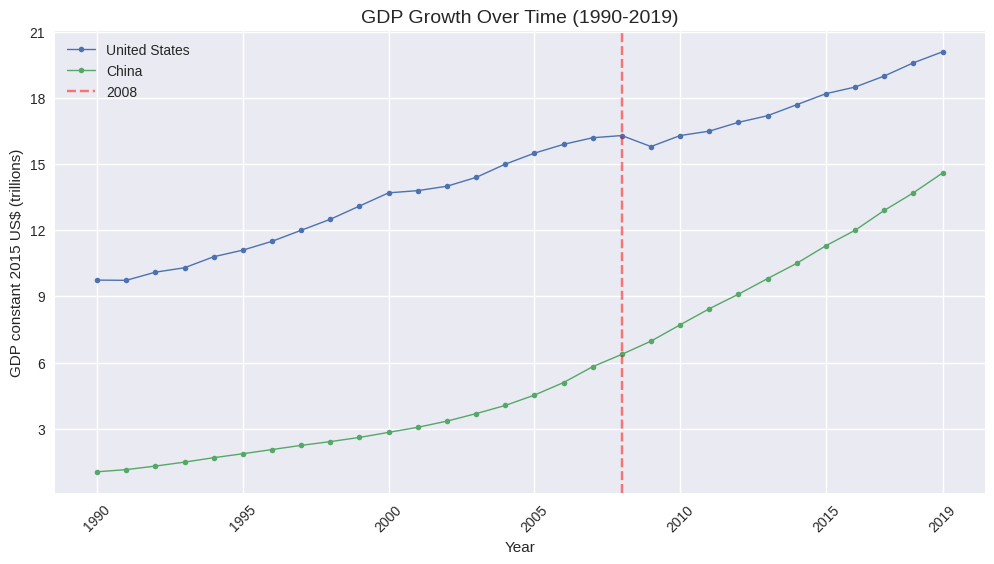

In [388]:
# plotting a time series plot

plt.figure(figsize=(12, 6))

plt.plot(df["Year"], df["US_GDP_Trillions"], label="United States", linewidth=1, marker="o", markersize=4)
plt.plot(df["Year"], df["CHN_GDP_Trillions"], label="China", linewidth=1, marker="o", markersize=4)
plt.title("GDP Growth Over Time (1990-2019)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP constant 2015 US$ (trillions)")
plt.axvline(x=2008, color="red", linestyle="--", alpha=0.5, label="2008")
plt.grid(alpha=1)

# Custom ticks
plt.xticks(range(1990, 2020, 1), rotation=45)
ticks = list(range(1990, 2020, 5)) + [2019]
plt.xticks(sorted(ticks))

# Force y-axis ticks to be integers
from matplotlib.ticker import MaxNLocator
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.legend()
plt.show()

From 1990 to 2019, total GDP increased in both the United States and China, but at very different rates. The United States experienced steady and consistent growth over the period, with a noticeable dip around 2008 during the global financial crisis. In contrast, China’s GDP grew at a much faster pace, especially after the early 2000s, showing a steep upward trajectory. While the United States maintained a higher total GDP throughout most of the period, the gap between the two countries narrowed significantly as China rapidly expanded its economic output.

<br>

**2. How did total CO₂ emissions change over the same period?**

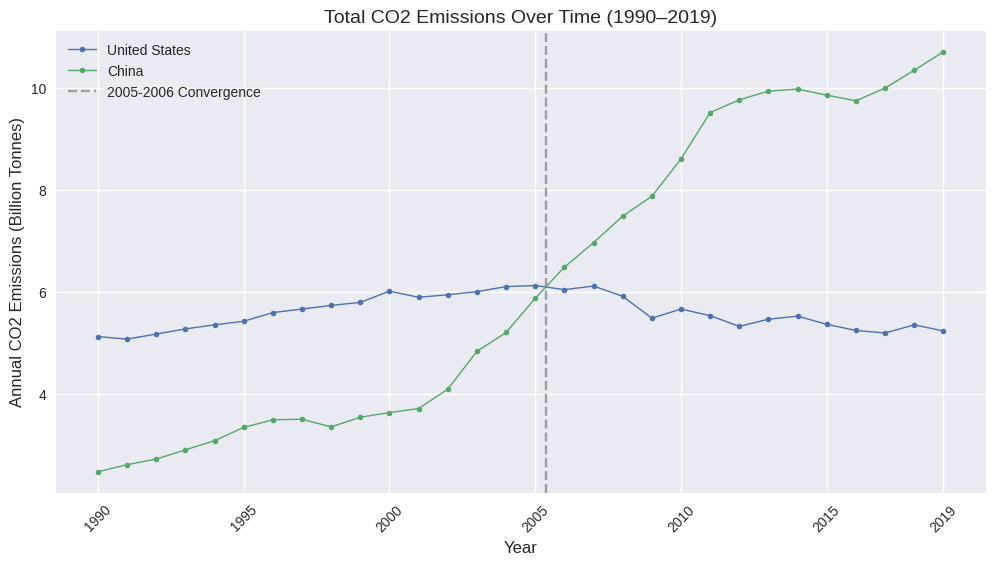

In [377]:
plt.figure(figsize=(12, 6))

plt.plot(df["Year"], df["US_Annual_CO2_Billion_Tonnes"], label="United States",linewidth=1, marker="o", markersize=4)
plt.plot(df["Year"], df["CHN_Annual_CO2_Billion_Tonnes"], label="China",linewidth=1, marker="o", markersize=4)
plt.title("Total CO2 Emissions Over Time (1990–2019)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Annual CO2 Emissions (Billion Tonnes)", fontsize=12)
plt.grid(alpha=1)
plt.axvline(x=2005.37, linestyle="--", color="gray", alpha=0.7, label="2005-2006 Convergence")

plt.xticks(rotation=45)
ticks = list(range(1990, 2020, 5)) + [2019]
plt.xticks(sorted(ticks))

plt.legend()
plt.show()

From 1990 to 2019, total CO₂ emissions followed different trajectories in the United States and China. United States emissions increased modestly during the 1990s, peaked in the mid-2000s, and then began to decline after 2007. In contrast, China’s emissions rose rapidly beginning in the early 2000s, reflecting its accelerated industrial expansion. Around 2005 to 2006, China’s total CO₂ emissions surpassed those of the United States, marking a structural shift in global emissions leadership. After that point, China remained the larger emitter for the remainder of the period.

<br>

**3. Which country had higher carbon intensity in 1990?**

In [327]:
df.loc[df["Year"] == 1990, ["US_Carbon_Intensity", "CHN_Carbon_Intensity"]].style.format({"US_Carbon_Intensity": "{:.2f}", "CHN_Carbon_Intensity": "{:.2f}"}).hide(axis="index")

US_Carbon_Intensity,CHN_Carbon_Intensity
0.53,2.38


In 1990, China had a significantly higher carbon intensity than the United States. China’s carbon intensity was approximately 2.38, compared to about 0.53 for the United States. This means that China emitted substantially more CO₂ per unit of economic output at the start of the period. In percentage terms, China’s carbon intensity was roughly 350% higher than that of the United States, indicating a large efficiency gap. In other words, the United States was considerably more growth-efficient in 1990, producing more GDP for each unit of carbon emitted.

<br>

**4. How did carbon intensity evolve over time in both countries?**

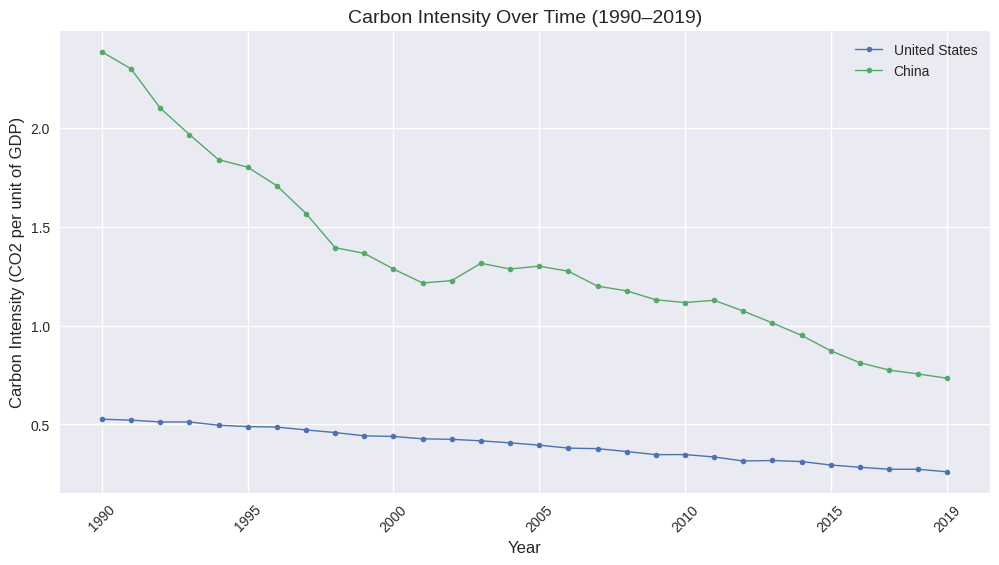

In [347]:
plt.figure(figsize=(12,6))

plt.plot(df["Year"], df["US_Carbon_Intensity"], label="United States", linewidth=1,marker="o", markersize=4)
plt.plot(df["Year"], df["CHN_Carbon_Intensity"], label="China", linewidth=1, marker="o", markersize=4)
plt.title("Carbon Intensity Over Time (1990–2019)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Carbon Intensity (CO2 per unit of GDP)", fontsize=12)
plt.grid(alpha=1)

plt.xticks(rotation=45)
ticks = list(range(1990, 2020, 5)) + [2019]
plt.xticks(sorted(ticks))


plt.legend()
plt.show()

From 1990 to 2019, carbon intensity declined in both the United States and China, indicating improvements in growth efficiency over time. The United States experienced a steady and gradual reduction in carbon intensity throughout the period. In contrast, China began with a much higher carbon intensity in 1990 but exhibited a noticeably steeper decline, especially after the mid-2000s. Although China remained more carbon-intensive than the United States by 2019, the sharper downward trend suggests that China made faster improvements in reducing emissions per unit of economic output.

<br>

**5. Which country experienced the larger percentage decline in carbon intensity from 1990 to 2019?**

In [357]:
us_1990 = df.loc[df["Year"] == 1990, "US_Carbon_Intensity"].values[0]
us_2019 = df.loc[df["Year"] == 2019, "US_Carbon_Intensity"].values[0]

chn_1990 = df.loc[df["Year"] == 1990, "CHN_Carbon_Intensity"].values[0]
chn_2019 = df.loc[df["Year"] == 2019, "CHN_Carbon_Intensity"].values[0]

us_decline = ((us_1990 - us_2019) / us_1990) * 100
chn_decline = ((chn_1990 - chn_2019) / chn_1990) * 100

decline_df = pd.DataFrame({
    "Country": ["United States", "China"],
    "Carbon Intensity Decline (%)": [us_decline, chn_decline]
})

decline_df.style.format({
    "Carbon Intensity Decline (%)": "{:.2f}%"
}).hide(axis="index")

Country,Carbon Intensity Decline (%)
United States,50.50%
China,69.24%


Between 1990 and 2019, both the United States and China significantly reduced their carbon intensity. The United States lowered its carbon intensity by approximately 50.5 percent over the period, reflecting steady improvements in energy efficiency and structural economic changes. China, however, achieved a larger proportional reduction of about 69.23 percent. Although China began with a much higher carbon intensity in 1990, it experienced a steeper decline over time. This indicates that China improved its growth efficiency at a faster rate than the United States, even though it did not completely eliminate the initial efficiency gap.

<br>

**6. Did either country experience periods of absolute decoupling where GDP increased while CO₂ emissions declined?**

In [378]:
# Calculate US GDP growth rate (year over year percent change)
df["US_GDP_Growth"] = df["US_GDP_Trillions"].pct_change()

# Calculate China GDP growth rate
df["CHN_GDP_Growth"] = df["CHN_GDP_Trillions"].pct_change()

# Calculate US CO2 growth rate
df["US_CO2_Growth"] = df["US_Annual_CO2_Billion_Tonnes"].pct_change()

# Calculate China CO2 growth rate
df["CHN_CO2_Growth"] = df["CHN_Annual_CO2_Billion_Tonnes"].pct_change()

# Flag absolute decoupling years for the US (GDP up, CO2 down)
df["US_Absolute_Decoupling"] = (df["US_GDP_Growth"] > 0) & (df["US_CO2_Growth"] < 0)

# Flag absolute decoupling years for China (GDP up, CO2 down)
df["CHN_Absolute_Decoupling"] = (df["CHN_GDP_Growth"] > 0) & (df["CHN_CO2_Growth"] < 0)

# Display the years where the US shows absolute decoupling
us_decouple_years = df.loc[df["US_Absolute_Decoupling"], ["Year"]]

# Display the years where China shows absolute decoupling
chn_decouple_years = df.loc[df["CHN_Absolute_Decoupling"], ["Year"]]

# Count how many absolute decoupling years each country has
us_count = int(df["US_Absolute_Decoupling"].sum())
chn_count = int(df["CHN_Absolute_Decoupling"].sum())

# Collect the years for each country as Python lists
us_years = df.loc[df["US_Absolute_Decoupling"], "Year"].tolist()
chn_years = df.loc[df["CHN_Absolute_Decoupling"], "Year"].tolist()

# Create a clean summary DataFrame
decouple_summary = pd.DataFrame({
    "Country": ["United States", "China"],
    "Absolute Decoupling Years (Count)": [us_count, chn_count],
    "Years": [", ".join(map(str, us_years)) if us_years else "None",
              ", ".join(map(str, chn_years)) if chn_years else "None"]
})

# Display the summary nicely without index
decouple_summary.style.hide(axis="index")


Country,Absolute Decoupling Years (Count),Years
United States,9,"2001, 2006, 2008, 2011, 2012, 2015, 2016, 2017, 2019"
China,3,"1998, 2015, 2016"


Between 1990 and 2019, the United States experienced 9 years of absolute decoupling, occurring in 2001, 2006, 2008, 2011, 2012, 2015, 2016, 2017, and 2019. In contrast, China experienced 3 such years, specifically in 1998, 2015, and 2016. This indicates that the United States more frequently achieved economic growth alongside reductions in emissions, particularly after the mid-2000s. While China made substantial improvements in carbon intensity over the full period, its rapid industrial expansion often coincided with rising emissions, resulting in fewer instances of absolute decoupling. Overall, sustained absolute decoupling appears to have been more consistent in the United States during this timeframe.

<br>

**7. How does GDP per capita compare between the two countries over time?**

In [384]:
# Compute US GDP per capita
# GDP is in trillions, population in millions
# Result will be in thousands of dollars
df["US_GDP_per_Capita_Thousands"] = df["US_GDP_Trillions"] / df["US_Population_Millions"] * 1000

# Compute China GDP per capita
df["CHN_GDP_per_Capita_Thousands"] = df["CHN_GDP_Trillions"] / df["CHN_Pop_Millions"] * 1000

# Preview first few rows
df[["Year", "US_GDP_per_Capita_Thousands", "CHN_GDP_per_Capita_Thousands"]].head().style.hide(axis="index")

Year,US_GDP_per_Capita_Thousands,CHN_GDP_per_Capita_Thousands
1990,38.441804,0.901541
1991,37.938160,0.973702
1992,38.904511,1.097445
1993,39.218673,1.236104
1994,40.682563,1.389578


From 1990 to 2019, GDP per capita increased substantially in both the United States and China, but large differences remained throughout the period. In 1990, US GDP per capita was approximately $38,400, compared to only about $900 in China. By 2019, US GDP per capita had risen to roughly $59500, a 54.9% growth, while China had increased significantly to about $10,300, a 10.4% growth. Although China experienced rapid growth in per capita income and narrowed the gap considerably, the United States maintained a substantially higher level of income per person over the entire period.

<br>

**8. How does CO₂ per capita compare between the two countries?**

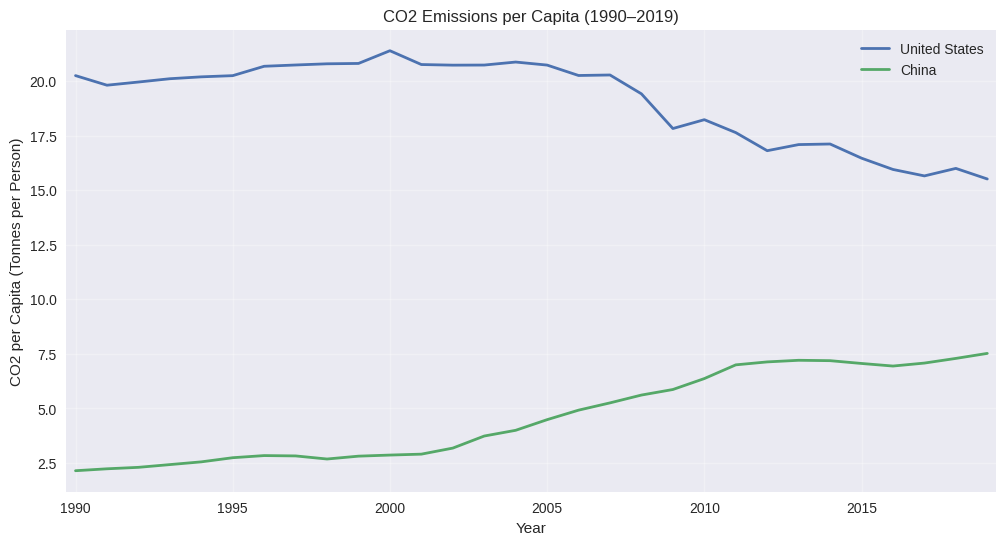

Country,1990 CO2 per Capita,2019 CO2 per Capita,Percent Change (%)
United States,20.25,15.51,-23.38%
China,2.15,7.52,249.96%


In [392]:
# Calculate US CO2 per capita in tonnes per person

# CO2 is in billion tonnes and population is in millions
# (billion tonnes / million people) = thousand tonnes per person, so multiply by 1000
df["US_CO2_per_Capita_Tonnes"] = df["US_Annual_CO2_Billion_Tonnes"] / df["US_Population_Millions"] * 1000

# Calculate China CO2 per capita in tonnes per person
df["CHN_CO2_per_Capita_Tonnes"] = df["CHN_Annual_CO2_Billion_Tonnes"] / df["CHN_Pop_Millions"] * 1000

# Plot CO2 per capita for both countries
plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["US_CO2_per_Capita_Tonnes"], label="United States", linewidth=2)
plt.plot(df["Year"], df["CHN_CO2_per_Capita_Tonnes"], label="China", linewidth=2)
plt.title("CO2 Emissions per Capita (1990–2019)")
plt.xlabel("Year")
plt.ylabel("CO2 per Capita (Tonnes per Person)")
plt.grid(alpha=0.3)
plt.legend()
plt.margins(x=0.01)
plt.show()

# Extract 1990 and 2019 per capita values for US
us_1990 = df.loc[df["Year"] == 1990, "US_CO2_per_Capita_Tonnes"].values[0]
us_2019 = df.loc[df["Year"] == 2019, "US_CO2_per_Capita_Tonnes"].values[0]

# Extract 1990 and 2019 per capita values for China
chn_1990 = df.loc[df["Year"] == 1990, "CHN_CO2_per_Capita_Tonnes"].values[0]
chn_2019 = df.loc[df["Year"] == 2019, "CHN_CO2_per_Capita_Tonnes"].values[0]

# Compute percent change for US
us_pct_change = ((us_2019 - us_1990) / us_1990) * 100

# Compute percent change for China
chn_pct_change = ((chn_2019 - chn_1990) / chn_1990) * 100

# Create a clean summary table
summary = pd.DataFrame({
    "Country": ["United States", "China"],
    "1990 CO2 per Capita": [us_1990, chn_1990],
    "2019 CO2 per Capita": [us_2019, chn_2019],
    "Percent Change (%)": [us_pct_change, chn_pct_change]
})

# Display the table with nice formatting and no index
summary.style.format({
    "1990 CO2 per Capita": "{:.2f}",
    "2019 CO2 per Capita": "{:.2f}",
    "Percent Change (%)": "{:.2f}%"
}).hide(axis="index")

CO₂ emissions per capita remained substantially higher in the United States than in China throughout the entire 1990 to 2019 period. In 1990, the United States emitted approximately 20.25 tonnes of CO₂ per person, compared to only about 2.15 tonnes per person in China. By 2019, US per capita emissions had declined to roughly 15.51 tonnes per person, while China’s had increased to approximately 7.52 tonnes per person. Although China’s per capita emissions rose by about 250 percent over the period, the United States still emitted roughly twice as much CO₂ per person as China in 2019.

This persistent gap suggests that the average American continues to consume more carbon-intensive goods and energy than the average Chinese citizen. Higher per capita emissions in the United States reflect differences in income levels, consumption patterns, energy use, transportation systems, and industrial structure. While China has improved carbon efficiency per unit of GDP, its per capita emissions remain below US levels, indicating that the overall lifestyle and economic structure in the United States remain more carbon-intensive on a per person basis.

<br>

**9. Is there evidence that China is converging toward United States carbon efficiency levels?**

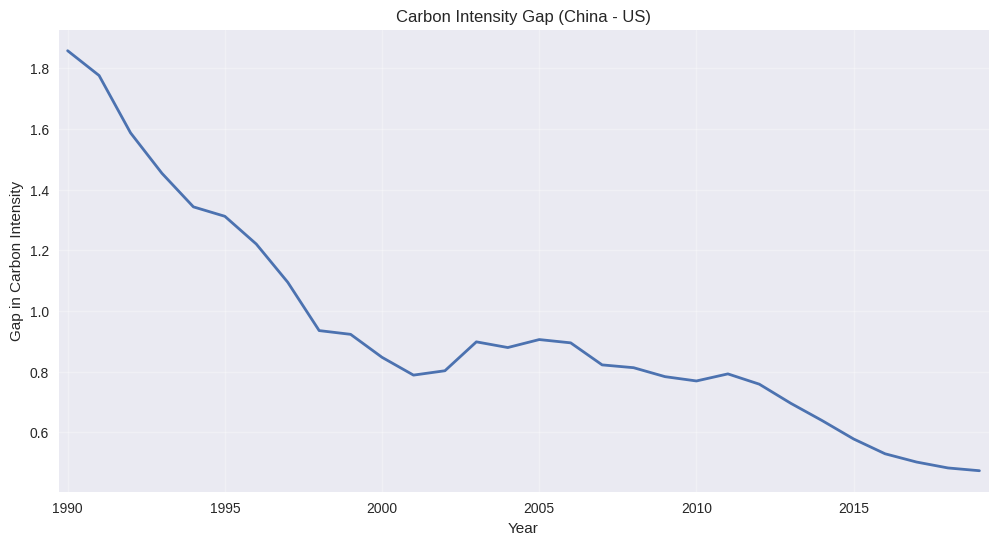

Year,Carbon_Intensity_Gap
1990,1.86
2019,0.47


In [403]:
# Compute carbon intensity gap (China minus US)
df["Carbon_Intensity_Gap"] = df["CHN_Carbon_Intensity"] - df["US_Carbon_Intensity"]

plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["Carbon_Intensity_Gap"], linewidth=2)
plt.title("Carbon Intensity Gap (China - US)")
plt.xlabel("Year")
plt.ylabel("Gap in Carbon Intensity")
plt.grid(alpha=0.3)
plt.margins(x=0.01)
plt.show()

# Display 1990 and 2019 gap
df.loc[df["Year"].isin([1990, 2019]), ["Year", "Carbon_Intensity_Gap"]].style.format({"Carbon_Intensity_Gap": "{:.2f}"}).hide(axis="index")

There is strong evidence of convergence in carbon efficiency between China and the United States from 1990 to 2019. In 1990, the carbon intensity gap between China and the United States was approximately 1.86, reflecting a substantial efficiency difference. By 2019, that gap had narrowed to about 0.47. This significant reduction indicates that China improved its carbon efficiency at a much faster rate over the period. Although China remained more carbon-intensive than the United States in 2019, the dramatic shrinking of the gap demonstrates clear partial convergence toward US carbon efficiency levels.

<br>

**10. Over the full 1990 to 2019 period, which country generated more GDP per ton of CO₂ on average?**

In [417]:
# Compute GDP per ton of CO2 for the US
df["US_GDP_per_Ton_CO2"] = df["US_GDP_Trillions"] / df["US_Annual_CO2_Billion_Tonnes"]

# Compute GDP per ton of CO2 for China
df["CHN_GDP_per_Ton_CO2"] = df["CHN_GDP_Trillions"] / df["CHN_Annual_CO2_Billion_Tonnes"]

# Check first few rows
df[["Year", "US_GDP_per_Ton_CO2", "CHN_GDP_per_Ton_CO2"]].head().style.format({"US_GDP_per_Ton_CO2": "{:.2f}", "CHN_GDP_per_Ton_CO2": "{:.2f}"}).hide(axis="index")

Year,US_GDP_per_Ton_CO2,CHN_GDP_per_Ton_CO2
1990,1.90,0.42
1991,1.92,0.44
1992,1.95,0.48
1993,1.95,0.51
1994,2.01,0.54


In [422]:
#Check the last few rows
df[["Year", "US_GDP_per_Ton_CO2", "CHN_GDP_per_Ton_CO2"]].tail().style.format({"US_GDP_per_Ton_CO2": "{:.2f}", "CHN_GDP_per_Ton_CO2": "{:.2f}"}).hide(axis="index")

Year,US_GDP_per_Ton_CO2,CHN_GDP_per_Ton_CO2
2015,3.39,1.15
2016,3.52,1.23
2017,3.65,1.29
2018,3.66,1.32
2019,3.84,1.36


In [431]:
# Compute average GDP per ton of CO2 over full period
us_avg = df["US_GDP_per_Ton_CO2"].mean()
chn_avg = df["CHN_GDP_per_Ton_CO2"].mean()

summary = pd.DataFrame({
    "Country": ["United States", "China"],
    "Average GDP per Ton CO2 (1990–2019)": [us_avg, chn_avg]
})

summary.style.format({
    "Average GDP per Ton CO2 (1990–2019)": "{:.2f}"
}).hide(axis="index")

Country,Average GDP per Ton CO2 (1990–2019)
United States,2.64
China,0.83


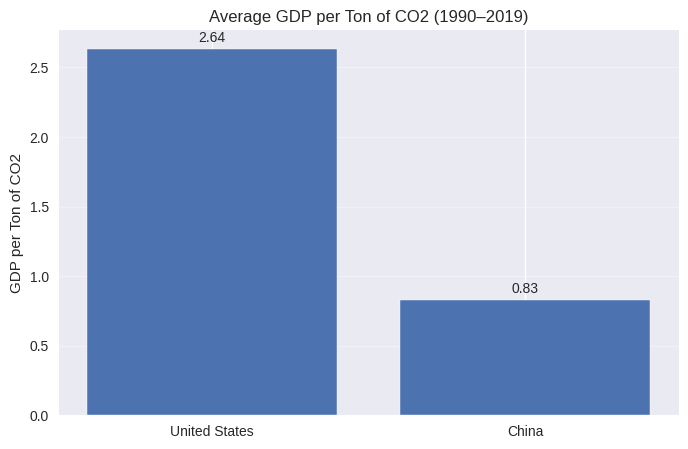

In [430]:
avg_df = pd.DataFrame({
    "Country": ["United States", "China"],
    "Average GDP per Ton CO2": [us_avg, chn_avg]
})

plt.figure(figsize=(8,5))
bars = plt.bar(avg_df["Country"], avg_df["Average GDP per Ton CO2"])

plt.title("Average GDP per Ton of CO2 (1990–2019)")
plt.ylabel("GDP per Ton of CO2")
plt.grid(axis="y", alpha=0.3)

# Add value labels on top of bars
for i in range(len(bars)):
    plt.text(i, avg_df["Average GDP per Ton CO2"][i] + 0.05,
             round(avg_df["Average GDP per Ton CO2"][i], 2),
             ha="center")

plt.show()

Over the 1990 to 2019 period, the United States generated substantially more GDP per ton of CO₂ on average than China. The United States produced approximately 2.64 units of GDP per ton of emissions, compared to about 0.83 units for China. This means that, on average, the US economy generated more than three times as much economic output for each ton of carbon emitted. Although China made rapid improvements in carbon intensity and significantly narrowed the efficiency gap over time, the United States maintained a consistently higher level of carbon efficiency throughout the entire period. This result highlights that while convergence occurred, the US remained more efficient in transforming emissions into economic output over the long run.

<br>

**Conclusion**

This project examined economic growth and carbon efficiency in the United States and China from 1990 to 2019. Over this period, both countries experienced substantial GDP growth, but China expanded at a much faster rate, significantly narrowing the gap in total economic size. However, the environmental consequences of that growth differed across countries.

In terms of total emissions, China’s CO₂ output rose rapidly during the early 2000s and surpassed that of the United States around 2005 to 2006. While US emissions peaked in the mid-2000s and later declined, China’s emissions continued to increase before stabilizing toward the end of the period.

When examining carbon intensity, defined as CO₂ per unit of GDP, both countries improved over time. China reduced its carbon intensity by approximately 69 percent, compared to about 50 percent for the United States. This led to a substantial narrowing of the carbon intensity gap, which declined from 1.86 in 1990 to 0.47 in 2019. This indicates clear partial convergence in carbon efficiency, although China did not fully reach US levels by the end of the period.

Despite improvements in efficiency, per capita emissions tell a different story. The United States consistently maintained much higher CO₂ emissions per person. Although US per capita emissions declined by roughly 23 percent, they remained approximately twice as high as China’s in 2019. This reflects structural differences in income levels, consumption patterns, energy use, and economic composition.

Finally, when measuring overall efficiency across the full period, the United States generated significantly more GDP per ton of CO₂ on average, about 2.64 compared to China’s 0.83. This means the US economy produced more than three times the economic output per unit of emissions over the three decades studied.

In conclusion, China demonstrated rapid economic expansion and significant improvements in carbon efficiency, narrowing the gap with the United States. However, the United States remained more carbon-efficient on average and maintained substantially higher per capita emissions. The results suggest that while convergence in efficiency is underway, structural differences in economic development and energy use continue to shape the environmental impact of growth in both countries.